#**Data Validation for Argentine Basin Global Array Dissolved Oxygen Data**
#OOI Biology Workshop Report

Author: Matthew J Kupchik

Date: 06/22/2018

#0. Review Summary
##*Dissolved Oxygen Measurement Comparisons Across Multiple Spatially and Temporally Similar Sensors*

The original idea was developed by looking at the available data products, including the primary plots provided in the OOI data portal and OOI visualocean.net as to the availability of certain data streams and their coverage. This was done to determine user access, potential availability of methodology, and to determine probable workflows for end level users. A derived data product was selected due to the possibility of confounding errors with a multi-stage computational product.

The first plan of action (POA) was determined to be analyzing the dissolved oxygen (DO) measuremnts for the Arentine Basin Global Array for a number of sensors as the Apex Surface Mooring and the Apex Profiler Mooring were closely related in space. Overlap with glider based profiling DO measuremnts made the ability to compare various sensors, entire water column, temporal relationships an obvious opportunity for identification of outliers in the data. This also happened to be some of the freshest Global Array data availble through the OOI data portal available for analysis. Initial results determined there were significant issues with the identified  first POA 2017 data available for deployment 3 across multiple sensors.

The second POA was devised using the same Global Array, the Argentine Basin, but along the second deployment which spanned the majority of 2016. Upon analysis of the available data through the OOI data portal, a number of data issues became available during the end user workflow. Secondary analysis of available data sets showed some issues with data availability, inclduing sensor errors during deployment, which ultimately led to the production of variable quality for several DO data products. The results of this primary investigation into the data validation and completness for the Argentine Basin Global Array are summarized in the following report.


#1. Site, Sensors, and Time-Period Included in This Report


##1.1 Platforms - Sensors



### 1.1.1 Apex Surface Mooring - GA01SUMO

As the data summarized in the initial investigation are shown with associated data plots in the OOI data portal, it appears as if there is significant coverage for a number of the DO sensors throughout the 3rd deployment, which encompasses the end of 2016 and the majority of 2017. Gaps for a number of sensors in 2016 are evident, including a number of identified gaps for the fixed-depth, energized cable DO sensors. In all cases the sensor identified for the collection of DO data was the Optode 4831, manufactured by Aanderaa. [Mfg. LINK](https://www.aanderaa.com/productsdetail.php?Oxygen-Optodes-2)


*   *Near Surface*  
      * Dissolved Oxygen (GA01SUMO-RID16-06-DOSTAD000)
          * ![alt text](https://i.imgur.com/nxuWre5.png)
          * Timeframe = year 2016
       
*  *Mooring RIser*  
      *   Dissolved Oxygen (40m) (GA01SUMO-RII11-02-DOSTAD031)
          * ![alt text](https://imgur.com/nxnzbkl.png)
          * Timeframe = year 2016
          
      *   Dissolved Oxygen (80 m) (GA01SUMO-RII11-02-DOSTAD032)
          * ![alt text](https://imgur.com/Q5kC7L4.png)
          * Timeframe = year 2016
          
      *   Dissolved Oxygen (130 m) (GA01SUMO-RII11-02-DOSTAD033)
          * ![alt text](https://imgur.com/m7utKeR.png)
          * Timeframe = year 2016
    
          



### 1.1.2 Apex Profiler Mooring               - GA02HYPM
*   *Wire-Following Profiler Upper*  
      *   Dissolved Oxygen (GA02HYPM-WFP02-03-DOSTAL000)
          * ![alt text](https://imgur.com/GZD0JaC.png)
          * Timeframe = year 2016
        
*   *Wire-Following Profiler Lower*  
      *    Dissolved Oxygen (GA02HYPM-WFP03-03-DOSTAL000)
           * ![alt text](https://imgur.com/cN7BTvD.png)
           * Timeframe = year 2016
           
     

     
### 1.1.3 Mobile Glider Assets               - GA05MOAS
*   *Near Surface*  
      *   Dissolved Oxygen (130 m) (GA01SUMO-RII11-02-DOSTAD033)
          * ![alt text](https://imgur.com/RsMTnPS.png)
          * Timeframe = year 2016
          

##1.2 Site Selected
![alt text](http://oceanobservatories.org/wp-content/uploads/2015/09/CEV-OOI-Global-Argentine-Basin.jpg)


#2. Related Metadata - Check the metadata included in the report is correct

The first goal is to determine if the metadata matches the instrument that is determined through both the OOI data portal, as well as through the oceanvisualization data team developed site.




##2.1 First import the necesary libraries and the username and token information

This step will bring in the necessary username and token information that will be required for the later informational data requests through the API, as well as install some basic libraries that will be useulf during the analysis.

In [0]:
#@title
# Input username and token for the API
USERNAME = ''
TOKEN =  ''

# Install into the VM the necessary Python libraries
!pip install pandas
!pip install xarray
!pip install netCDF4
!pip install xarray
!pip install cmocean

# Import the necessary libraries into the virtual worksplace
import requests
import datetime
import time
import pandas as pd
import xarray as ar
import matplotlib.pyplot  as plt
import netCDF4 as nc
import xarray as xr
import cmocean

##2.2 List the Sites of Importance Identified for the Metadata and Cross-Analysis

Based on the summary of sites, moorings, nodes, and sensros provided previously, those sites need to be delineated as variables for later API calls for each of the various datsets needed to complete the cross comparison.



###2.2.1 Apex Surface Mooring

The Apex surface mooring has a total of four (4) sensors to be included in the analysis. The first sensor is the "surface" DO sensor located at a depth of approximately 7 m depth. The other DO sensors are at fixed depths of 40 m , 80 m, and 130 m. The Surface sensor is located on a separate node from the other three sensors. All other sensors are located on the nergized cable below the buoy and contained within the same node. Each instrument has its own identifier, and all have the same method of data recovery for the isntruments due to a lack of telemetry data. The surface mooring also has a separate stream of data than the three deeper instruments.

In [0]:
#@title
#Information for constructing the request 
# Site Information for the Surface Mooring
Ssite = 'GA01SUMO'
#Node Information for the surface mooring and the lower fixed DO sensors
Snode1 = 'RID16'
Snode2 = 'RII11'
#Present the isntrument requests
SinstrumentS = '06-DOSTAD000'
Sinstrument40 = '02-DOSTAD031'
Sinstrument80 = '02-DOSTAD032'
Sinstrument130 = '02-DOSTAD033'
#Method is the same for all of these instruments due to bad telemetry data for the timeframe
method = 'recovered_host'
#Stream data for each of the sintruments
SstreamS = 'dosta_abcdjm_dcl_instrument_recovered'
SstreamD = 'dosta_abcdjm_ctdbp_p_dcl_instrument_recovered'

###2.2.2 Apex Profiler Mooring
The Apex Profiler Mooring has two dissolved oxygen sensors which are located as wire profiler packages. The upper wire profiler ranges from approximately 2200 meters to approximately 300 m depth. The lower wire profiler ranges from approximately 2300 m to a bottom depth of near 5000 m, the deepest part of the Argentine basin along the abyssal plain. Interestingly, the only difference in designation for these two sensors is the 'node' designation. All other data is consistent between the instruments. 

In [0]:
#@title
#Information for constructing the request 
# Site Information for the Surface Mooring
Psite = 'GA02HYPM'
#Node Information for the surface mooring and the lower fixed DO sensors
Pnode1 = 'WFP02'
Pnode2 = 'WFP03'
#Present the isntrument requests - same instrument designator
Pinstrument = '03-DOSTAL000'
#Method is the same for all of these instruments due to bad telemetry data for the timeframe
Pmethod = 'recovered_wfp'
#Stream data for each of the sintruments
Pstream = 'dosta_ln_wfp_instrument_recovered'

### 2.2.3 Profiling Glider

The profiling gliders are only part of the glider deployment for the Argentine Basin Global Array. Each of the gliders is part of the mobile asset designation. However, each is represented under a separate node todesignate the individual glider. As the gliders are seaparted into both profiling (near surface) and oceanic (deep-diving), the gliders need to be indidivually investigated to determine which vehicles correpsond individually to the data resources required for the analysis.

In [0]:
#@title
#Information for constructing the request 
# Site Information for the Surface Mooring
Gsite = 'GA05MOAS'
#Node Information for the surface mooring and the lower fixed DO sensors
Gnode = 'PG563'
#Present the isntrument requests - same instrument designator
Ginstrument = '02-DOSTAM000'
#Method is the same for all of these instruments due to bad telemetry data for the timeframe
Gmethod = 'recovered_host'
#Stream data for each of the sintruments
Gstream = 'dosta_abcdjm_glider_recovered'

##2.3 Pull Some of the Vocab Metadata Information

The vocab metadata information will make sure we have identified the right instruments in our initial instrument call above and that the results are going to be provided by the predetermined and identified isntruments.



### 2.3.1 Vocabulary Metadata for the Apex Surface Mooring

Here we are going to set-up and determine that the identified sites, nodes, and instruments are the appropriate ones previously identified for the surface sensor, and the fixed depth sensors at 40 m, 80 m, and 130 m.

In [0]:
#@title
#List the Vocab API
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'

# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None

# CHeck the SUrface Mooring Instrument
# Setup the API request url
vocabdata_request_urlS ='/'.join((VOCAB_API,Ssite,Snode1,SinstrumentS))
print vocabdata_request_urlS
# Grab the information from the server
r = requests.get(vocabdata_request_urlS, auth=(USERNAME, TOKEN))
vocabS = r.json()
print vocabS

# CHeck the 40 m Mooring Instrument
# Setup the API request url
vocabdata_request_url40 ='/'.join((VOCAB_API,Ssite,Snode2,Sinstrument40))
print vocabdata_request_url40
# Grab the information from the server
r = requests.get(vocabdata_request_url40, auth=(USERNAME, TOKEN))
vocab40 = r.json()
print vocab40

# CHeck the 80 m Mooring Instrument
# Setup the API request url
vocabdata_request_url80 ='/'.join((VOCAB_API,Ssite,Snode2,Sinstrument80))
print vocabdata_request_url80
# Grab the information from the server
r = requests.get(vocabdata_request_url80, auth=(USERNAME, TOKEN))
vocab80 = r.json()
print vocab80

# CHeck the 130 m Mooring Instrument
# Setup the API request url
vocabdata_request_url130 ='/'.join((VOCAB_API,Ssite,Snode2,Sinstrument130))
print vocabdata_request_url130
# Grab the information from the server
r = requests.get(vocabdata_request_url130, auth=(USERNAME, TOKEN))
vocab130 = r.json()
print vocab130


https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GA01SUMO/RID16/06-DOSTAD000
[{u'tocL3': u'Near Surface Instrument Frame', u'mindepth': 12.0, u'instrument': u'Dissolved Oxygen', u'tocL2': u'Apex Surface Mooring', u'vocabId': 743, u'tocL1': u'Global Argentine Basin', u'maxdepth': 12.0, u'model': u'Optode 4831', u'manufacturer': u'Aanderaa', u'@class': u'.VocabRecord', u'refdes': u'GA01SUMO-RID16-06-DOSTAD000'}]
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GA01SUMO/RII11/02-DOSTAD031
[{u'tocL3': u'Mooring Riser', u'mindepth': 40.0, u'instrument': u'Dissolved Oxygen (40 meters)', u'tocL2': u'Apex Surface Mooring', u'vocabId': 765, u'tocL1': u'Global Argentine Basin', u'maxdepth': 40.0, u'model': u'Optode 4831', u'manufacturer': u'Aanderaa', u'@class': u'.VocabRecord', u'refdes': u'GA01SUMO-RII11-02-DOSTAD031'}]
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GA01SUMO/RII11/02-DOSTAD032
[{u'tocL3': u'Mooring Riser', u'mindepth': 80.0, u'instrumen

### 2.3.2 Vocabulary Metadata for the Apex Profiler Mooring

Setup and call the vocabulary metadat information for the upper water column and lower water column wire profilers to determine if the sensors are correct and that the apprropriate instrument is being referenced.

In [0]:
#@title
# Check the Upper Profiler
# Setup the API request url
vocabdata_request_urlUP ='/'.join((VOCAB_API,Psite,Pnode1,Pinstrument))
print vocabdata_request_urlUP
# Grab the information from the server
r = requests.get(vocabdata_request_urlUP, auth=(USERNAME, TOKEN))
vocabUP = r.json()
print vocabUP

# Check the Lower Profiler
# Setup the API request url
vocabdata_request_urlLP ='/'.join((VOCAB_API,Psite,Pnode2,Pinstrument))
print vocabdata_request_urlLP
# Grab the information from the server
r = requests.get(vocabdata_request_urlLP, auth=(USERNAME, TOKEN))
vocabLP = r.json()
print vocabLP


https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GA02HYPM/WFP02/03-DOSTAL000
[{u'tocL3': u'Wire-Following Profiler Upper', u'mindepth': 310.0, u'instrument': u'Dissolved Oxygen', u'tocL2': u'Apex Profiler Mooring', u'vocabId': 804, u'tocL1': u'Global Argentine Basin', u'maxdepth': 2573.0, u'model': u'Optode 4330', u'manufacturer': u'Aanderaa', u'@class': u'.VocabRecord', u'refdes': u'GA02HYPM-WFP02-03-DOSTAL000'}]
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GA02HYPM/WFP03/03-DOSTAL000
[{u'tocL3': u'Wire-Following Profiler Lower', u'mindepth': 2600.0, u'instrument': u'Dissolved Oxygen', u'tocL2': u'Apex Profiler Mooring', u'vocabId': 810, u'tocL1': u'Global Argentine Basin', u'maxdepth': 5023.0, u'model': u'Optode 4330', u'manufacturer': u'Aanderaa', u'@class': u'.VocabRecord', u'refdes': u'GA02HYPM-WFP03-03-DOSTAL000'}]


### 2.3.3 Vocabulary Metadata for Profiling Glider 

The appropriate data for the glider identified for the appropriate time period and the data associated to determine that the right glider and sensor are being referenced.

In [0]:
#@title
# Check the Glider
# Setup the API request url
vocabdata_request_urlG ='/'.join((VOCAB_API,Gsite,Gnode,Ginstrument))
print vocabdata_request_urlG
# Grab the information from the server
r = requests.get(vocabdata_request_urlG, auth=(USERNAME, TOKEN))
vocabG = r.json()
print vocabG

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GA05MOAS/PG563/02-DOSTAM000
[{u'tocL3': u'Profiling Glider 563', u'mindepth': 0.0, u'instrument': u'Dissolved Oxygen', u'tocL2': u'Mobile Assets', u'vocabId': 1522, u'tocL1': u'Global Argentine Basin', u'maxdepth': 200.0, u'model': u'Optode 4831', u'manufacturer': u'Aanderaa', u'@class': u'.VocabRecord', u'refdes': u'GA05MOAS-PG563-02-DOSTAM000'}]


##2.4 Deployment Data for the Inclusive Total Date Range of All Instruments



###2.4.1 Apex Surface Mooring

Setting the dates for the year 2016 for the Apex Surface Mooring to determine that the correct deployment is being requested for the year inclusive of 2016. This includes the surface mooring DO sensor at a depth of 7 m and the fixed depth sensors at depths of 40 m, 80 m, and 130 m.

*Potential tightening of the code could be conducted with further time allotted to call the data within a loop to select only the nodes and instruments colected within a secondary nested structure.*

In [0]:
#@title
#Surface Mooring
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_urlSM = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode1+'-'+SinstrumentS,   
}
# Grab the information from the server
r = requests.get(data_request_urlSM, params=params, auth=(USERNAME, TOKEN))
SM = r.json()

#40m mooring
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_url40 = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode2+'-'+Sinstrument40,   
}
# Grab the information from the server
r = requests.get(data_request_url40, params=params, auth=(USERNAME, TOKEN))
S40 = r.json()

#80m mooring
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_url80 = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode2+'-'+Sinstrument80,   
}
# Grab the information from the server
r = requests.get(data_request_url80, params=params, auth=(USERNAME, TOKEN))
S80 = r.json()

#130m mooring
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_url130 = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode2+'-'+Sinstrument130,   
}
# Grab the information from the server
r = requests.get(data_request_url130, params=params, auth=(USERNAME, TOKEN))
S130 = r.json()

dSM = pd.DataFrame() # Setup empty array
for d in SM:
  dSM = dSM.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
for d in S40:
  dSM = dSM.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
for d in S80:
  dSM = dSM.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
for d in S130:
  dSM = dSM.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
dSM

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,2565.0,2.0,-42.9246,-42.586680,CGINS-DOSTAD-00460,2015-11-14 21:06:00,2016-11-08 10:10:00
1,567.0,3.0,-42.9204,-42.440932,CGINS-DOSTAD-00376,2016-10-27 01:47:00,2018-01-14 10:24:00
2,2563.0,2.0,-42.9246,-42.586680,CGINS-DOSTAD-00462,2015-11-14 21:06:00,2016-11-08 10:10:00
3,576.0,3.0,-42.9204,-42.440932,CGINS-DOSTAD-00379,2016-10-27 01:47:00,2018-01-14 10:24:00
4,2562.0,2.0,-42.9246,-42.586680,CGINS-DOSTAD-00463,2015-11-14 21:06:00,2016-11-08 10:10:00
5,523.0,3.0,-42.9204,-42.440932,CGINS-DOSTAD-00382,2016-10-27 01:47:00,2018-01-14 10:24:00
6,2561.0,2.0,-42.9246,-42.586680,CGINS-DOSTAD-00464,2015-11-14 21:06:00,2016-11-08 10:10:00
7,524.0,3.0,-42.9204,-42.440932,CGINS-DOSTAD-00385,2016-10-27 01:47:00,2018-01-14 10:24:00


###2.4.2 Apex Profiler Mooring

Deployment information for the year 2016 for the two wire profiling packages to measure DO.

In [0]:
#@title
#Upper Crawler
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_urlUC = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Psite+'-'+Pnode1+'-'+Pinstrument,   
}
# Grab the information from the server
r = requests.get(data_request_urlUC, params=params, auth=(USERNAME, TOKEN))
UC = r.json()

#Lower Crawler
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_urlLC = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Psite+'-'+Pnode2+'-'+Pinstrument,   
}
# Grab the information from the server
r = requests.get(data_request_urlLC, params=params, auth=(USERNAME, TOKEN))
LC = r.json()
 

dPF = pd.DataFrame() # Setup empty array
for d in UC:
  dPF = dPF.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
for d in LC:
  dPF = dPF.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
dPF

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,2478.0,2.0,-42.980830,-42.541920,CGINS-DOSTAL-02197,2015-11-16 18:36:00,2016-11-05 00:00:00
1,2371.0,3.0,-42.978048,-42.495665,CGINS-DOSTAL-01477,2016-10-29 22:10:00,2018-01-11 15:09:00
2,2483.0,2.0,-42.980830,-42.541920,CGINS-DOSTAL-02196,2015-11-16 18:36:00,2016-11-05 00:00:00
3,2420.0,3.0,-42.978048,-42.495665,CGINS-DOSTAL-01473,2016-10-29 22:10:00,2018-01-11 15:09:00


### 2.4.3 Profiling Glider 

Deployment information for the profiling glider that matches up in space and time for the Argentine Basin Global Array for the deployment in 2016, in part.

In [0]:
#@title
#Lower Crawler
# Setup the API request url# Setup 
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
data_request_urlPG = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':Gsite+'-'+Gnode+'-'+Ginstrument,   
}
# Grab the information from the server
r = requests.get(data_request_urlPG, params=params, auth=(USERNAME, TOKEN))
PG = r.json()

dPG = pd.DataFrame() # Setup empty array
for d in PG:
  dPG = dPG.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
dPG

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,1862.0,1.0,-42.58833,-42.645,CGINS-DOSTAM-00423,2015-11-24 21:47:00,2016-05-02


##2.5 Calibration Information

Calibration information is needed to determine that calibrations have been condcuted for each sensor for each deployment. Due to the extended nature of each Global Array deployment, calibration may result in drift from beginning to end. Although ther eare calibrations provided for each instrument, extended deployments may require further calibration profiles for extended environemtnal impacts on weak-link sensor components.



###2.5.1 Apex Surface Mooring

The calls for the calibration information to pull the information for each of the the sensors (i.e., the 7m, 40m, 80m, and 130 m depth) included in the Apex Surface Mooring and the energized cable.

In [0]:
#@title
# Setup the API request url - SM
data_request_urlSM = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-02-01T00:00:00.000Z',
  'endDT':'2016-02-02T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode1+'-'+'06-DOSTAD000',
}
# Grab the information from the server
r = requests.get(data_request_urlSM, params=params, auth=(USERNAME, TOKEN))
CalSM1 = r.json()

# Setup the API request url - 40 m
data_request_url40 = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-02-01T00:00:00.000Z',
  'endDT':'2016-02-02T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode2+'-'+'02-DOSTAD031',
}
# Grab the information from the server
r = requests.get(data_request_url40, params=params, auth=(USERNAME, TOKEN))
Cal40 = r.json()

# Setup the API request url - 80 m
data_request_url80 = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-02-01T00:00:00.000Z',
  'endDT':'2016-02-02T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode2+'-'+'02-DOSTAD032',
}
# Grab the information from the server
r = requests.get(data_request_url80, params=params, auth=(USERNAME, TOKEN))
Cal80 = r.json()

# Setup the API request url - 130 m
data_request_url130 = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-02-01T00:00:00.000Z',
  'endDT':'2016-02-02T00:00:00.000Z',
  'refdes':Ssite+'-'+Snode2+'-'+'02-DOSTAD033',
}
# Grab the information from the server
r = requests.get(data_request_url130, params=params, auth=(USERNAME, TOKEN))
Cal130 = r.json()

# Reformat the data into a pretty table
CalSM = pd.DataFrame() # Setup empty array
for d in CalSM1:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      CalSM = CalSM.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
for d in Cal40:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      CalSM = CalSM.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)   
for d in Cal80:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      CalSM = CalSM.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
for d in Cal130:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      CalSM = CalSM.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
      
      
CalSM = CalSM.sort_values(by=['start','name'])
CalSM

,assetUid,name,start,stop,value
1,CGINS-DOSTAD-00460,CC_conc_coef,2015-11-14,None,"[0.0, 1.0]"
3,CGINS-DOSTAD-00462,CC_conc_coef,2015-11-14,None,"[0.0, 1.0]"
5,CGINS-DOSTAD-00463,CC_conc_coef,2015-11-14,None,"[0.0, 1.0]"
7,CGINS-DOSTAD-00464,CC_conc_coef,2015-11-14,None,"[0.0, 1.0]"
0,CGINS-DOSTAD-00460,CC_csv,2015-11-14,None,"[0.00284398, 0.000120647, 2.4402e-06, 230.789, -0.309291, -56.0338, 4.56182]"
2,CGINS-DOSTAD-00462,CC_csv,2015-11-14,None,"[0.00281045, 0.000119919, 2.43783e-06, 229.983, -0.309293, -58.328, 4.54499]"
4,CGINS-DOSTAD-00463,CC_csv,2015-11-14,None,"[0.00284389, 0.000120462, 2.41676e-06, 231.388, -0.328965, -56.2037, 4.553]"
6,CGINS-DOSTAD-00464,CC_csv,2015-11-14,None,"[0.00276664, 0.000118732, 2.29776e-06, 229.383, -0.364046, -57.1255, 4.56282]"


###2.5.2 Apex **Profiling** Mooring

A pull for the calibration information that i relevant to the deployment of both the upper wire crawler and the lower wire crawler profilers from the Apex Profiler Mooring.

In [0]:
#@title
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
# Setup the API request url - UC
data_request_urlUC = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-01-15T00:00:00.000Z',
  'endDT':'2016-01-16T00:00:00.000Z',
  'refdes':Psite+'-'+Pnode1+'-'+'03-DOSTAL000',
}
# Grab the information from the server
r = requests.get(data_request_urlUC, params=params, auth=(USERNAME, TOKEN))
CalUC1 = r.json()

# Setup the API request url - LC
data_request_urlLC = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-01-15T00:00:00.000Z',
  'endDT':'2016-01-16T00:00:00.000Z',
  'refdes':Psite+'-'+Pnode2+'-'+'03-DOSTAL000',
}
# Grab the information from the server
r = requests.get(data_request_urlLC, params=params, auth=(USERNAME, TOKEN))
CalLC1 = r.json()

# Reformat the data into a pretty table
CalPM = pd.DataFrame() # Setup empty array
for d in CalUC1:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      CalPM = CalPM.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    

CalPM = CalPM.sort_values(by=['start','name'])
CalPM

KeyError: ignored

###2.5.3 Profiling Glider

A call for the profiling glider information for the deployment necessary for the comparison.

In [0]:
#@title
# Setup the API request url - Glider
data_request_urlG = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-02-01T00:00:00.000Z',
  'endDT':'2016-02-02T00:00:00.000Z',
  'refdes':Gsite+'-'+Gnode+'-'+'02-DOSTAM000',
}

# Grab the information from the server
r = requests.get(data_request_urlG, params=params, auth=(USERNAME, TOKEN))
CalPG1 = r.json()

# Reformat the data into a pretty table
CalPG = pd.DataFrame() # Setup empty array
for d in CalPG1:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      CalPG = CalPG.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
CalPG = CalPG.sort_values(by=['start','name'])
CalPG

,assetUid,name,start,stop,value
0,CGINS-DOSTAM-00423,CC_calibration_date,2015-01-25,None,1.422144e+12


## 2.6 Annotations for the Instruments

Annotation information that has already been entered into the OOI data portal to help end-level users with understanding known issues, gaps, and potential interpretability issues with the associated data structure.





###2.6.1 Annotations for Surface Mooring

The call for the annotations for the four sensors associated with the surface mooring and the known issues that have already been described for the 2016 data.

In [0]:
#@title
#For the SUrface Mooring
ANNO_API_SM = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':Ssite+'-'+Snode1+'-'+SinstrumentS,
}
#Make the request for data
r = requests.get(ANNO_API_SM, params=params, auth=(USERNAME, TOKEN))
AnSM1 = r.json()

#For the 40
ANNO_API_40 = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':Ssite+'-'+Snode2+'-'+Sinstrument40,
}
#Make the request for data
r = requests.get(ANNO_API_40, params=params, auth=(USERNAME, TOKEN))
An40 = r.json()

#For the 80
ANNO_API_80 = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':Ssite+'-'+Snode2+'-'+Sinstrument80,
}
#Make the request for data
r = requests.get(ANNO_API_80, params=params, auth=(USERNAME, TOKEN))
An80 = r.json()

#For the 130
ANNO_API_130 = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':Ssite+'-'+Snode2+'-'+Sinstrument130,
}
#Make the request for data
r = requests.get(ANNO_API_130, params=params, auth=(USERNAME, TOKEN))
An130 = r.json()

AnSM = pd.DataFrame() # Setup empty array
for d in AnSM1:
  AnSM = AnSM.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
for d in An40:
  AnSM = AnSM.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
for d in An80:
  AnSM = AnSM.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
for d in An130:
  AnSM = AnSM.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
AnSM

,annotation,id,node,sensor,site,start,stop
0,"The derived O2 products (L1 Temperature Compensated and L2 Salinity Corrected Dissolved Oxygen) are suspect, due to errors during vendor calibration. Until a correction can be applied, they should not be used from 10/27/2016 onwards.",86.0,RII11,02-DOSTAD031,GA01SUMO,2016-10-27 00:00:00,None
1,"Deployment 3: Upon recovery, the cable to the CTDBP was severed.",389.0,RII11,02-DOSTAD031,GA01SUMO,2016-10-27 01:47:00,2017-05-11 20:41:00
2,"The derived O2 products (L1 Temperature Compensated and L2 Salinity Corrected Dissolved Oxygen) are suspect, due to errors during vendor calibration. Until a correction can be applied, they should not be used from 10/27/2016 onwards.",87.0,RII11,02-DOSTAD032,GA01SUMO,2016-10-27 00:00:00,None


###2.6.2 Annotations for Profiling Mooring

The call for the annotations to pul known issues with data associated with each of the two wire profilers associated with the profiling mooring in response to the DO sensor. 

In [0]:
#@title
#For the UC
ANNO_API_UC = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':Psite+'-'+Pnode1+'-'+Pinstrument,
}
#Make the request for data
r = requests.get(ANNO_API_UC, params=params, auth=(USERNAME, TOKEN))
AnUC = r.json()

#For the LC
ANNO_API_LC = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2016,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':Psite+'-'+Pnode2+'-'+Pinstrument,
}
#Make the request for data
r = requests.get(ANNO_API_LC, params=params, auth=(USERNAME, TOKEN))
AnLC = r.json()


AnPM = pd.DataFrame() # Setup empty array
for d in AnUC:
  AnPM = AnPM.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
for d in AnLC:
  AnPM = AnPM.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
AnPM

,annotation,id,node,sensor,site,start,stop
0,"Deployment 2: At the initial recovery attempt of this mooring in Nov 2016, it was determined that the mooring had fallen and was not recovered. During the following cruise in Jan 2018, the mooring was successfully recovered on 2018-01-15T09:30:00.",130.0,None,None,GA02HYPM,2015-11-16 18:36:00,2016-11-05 00:00:00
1,Deployments 2 and 3: Data were not transmitted via satellite telemetry.,374.0,None,None,GA02HYPM,2015-11-16 18:36:00,2018-01-11 15:09:00
2,"Deployment 2: At the initial recovery attempt of this mooring in Nov 2016, it was determined that the mooring had fallen and was not recovered. During the following cruise in Jan 2018, the mooring was successfully recovered on 2018-01-15T09:30:00.",130.0,None,None,GA02HYPM,2015-11-16 18:36:00,2016-11-05 00:00:00
3,Deployments 2 and 3: Data were not transmitted via satellite telemetry.,374.0,None,None,GA02HYPM,2015-11-16 18:36:00,2018-01-11 15:09:00


###2.6.3 Annotations for Profiling Glider

An API pull of the known data issues with  profiling glider data structure. 

In [0]:
#@title
ANNO_API_PG = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':Gsite+'-'+Gnode+'-'+Ginstrument,
}

r = requests.get(ANNO_API_PG, params=params, auth=(USERNAME, TOKEN))
AnPG1 = r.json()

AnPG = pd.DataFrame() # Setup empty array
for d in AnPG1:
  AnPG = AnPG.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
AnPG

""


# 3. The Full Datasets for Cross Analyses

Datasets needed to be requested asynchronously from the OOI data server. The follwoing code blocks are desinged to make the requests for the necessary data to be supplied for further analysis of the DO data. The following code has been commented out as it has already been requested and served by the THREDDS data server.



## 3.1 The Dissolved Oxygen Data for the Surface Mooring



### 3.1.1 Information for the Data Call of the 7 m Depth Sensor

In [0]:
#@title
#API base url
#SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the full request URL
#data_request_urlSM ='/'.join((SENSOR_BASE_URL,Ssite,Snode1,SinstrumentS,method,SstreamS))
#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T00:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}
#
#r = requests.get(data_request_urlSM, params=params, auth=(USERNAME, TOKEN))
#DataSM = r.json()

#DataSM


### 3.1.2 Information for the Data Call of the 40 m Depth Sensor

In [0]:
#@title
#Request the 40m data
#data_request_url40 ='/'.join((SENSOR_BASE_URL,Ssite,Snode2,Sinstrument40,method,SstreamD))

#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T00:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}

#r = requests.get(data_request_url40, params=params, auth=(USERNAME, TOKEN))
#Data40 = r.json()

#Data40

### 3.1.3 Information for the Data Call of the 80 m Depth Sensor

In [0]:
#@title
#Request the 80m data
#data_request_url80 ='/'.join((SENSOR_BASE_URL,Ssite,Snode2,Sinstrument80,method,SstreamD))

#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T00:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}

#r = requests.get(data_request_url80, params=params, auth=(USERNAME, TOKEN))
#Data80 = r.json()

#Data80

### 3.1.4 Information for the Data Call of the 130 m Depth Sensor

In [0]:
#@title
#data_request_url130 ='/'.join((SENSOR_BASE_URL,Ssite,Snode2,Sinstrument130,method,SstreamD))

#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T00:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}

#r = requests.get(data_request_url130, params=params, auth=(USERNAME, TOKEN))
#Data130 = r.json()

#Data130

## 3.2 The Dissolved Oxygen Data for the Profiling Mooring




### 3.2.1 Information for the Data Call of the Upper Wire Crawler

In [0]:
#@title
# API base url
#SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

#data_request_urlUC1 ='/'.join((SENSOR_BASE_URL,'GA02HYPM','WFP02','03-DOSTAL000','recovered_wfp','dosta_ln_wfp_instrument_recovered'))

#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T00:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}

#r = requests.get(data_request_urlUC1, params=params, auth=(USERNAME, TOKEN))
#DataUC = r.json()

#DataUC


### 3.2.2 Information for the Data Call of the Lower Wire Crawler

In [0]:
#@title
#data_request_urlLC ='/'.join((SENSOR_BASE_URL,'GA02HYPM','WFP03','03-DOSTAL000','recovered_wfp','dosta_ln_wfp_instrument_recovered'))

#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T23:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}

#r = requests.get(data_request_urlLC, params=params, auth=(USERNAME, TOKEN))
#DataLC = r.json()

#DataLC

## 3.3 The Dissolved Oxygen Data for the Profiling Glider

### 3.3.1 Information for the Data Call of the Glider

In [0]:
#@title
#data_request_urlPG ='/'.join((SENSOR_BASE_URL,Gsite,Gnode,Ginstrument,Gmethod,Gstream))

#params = {
#  'beginDT':'2016-01-01T00:00:00.000Z',
#  'endDT':'2017-01-01T00:00:00.000Z',
#  'format':'application/netcdf',
#  'include_provenance':'true',
#  'include_annotations':'true'
#}

#r = requests.get(data_request_urlPG, auth=(USERNAME, TOKEN))
#DataPG = r.json()

#DataPG

#4. Opening the Data Files from Each of the Instruments

After confirmation that the OOI data server has provided the necessary NETcdf files, the follwing blocks of code read in and allocate the necessary data sets for plotting and analysis issues.



##4.1 Bringing in the Data From the Surface Mooring

It becomes apparent from the access of data into an xarray data structure that the available data from the surface DO sensor (~7m) and those at the other fixed depths (40m, 80m, 130m) are in different formats, have differnet calculations, and result in different variables. This creates issues for end level users without the access to information on how data structures are appropriated for the various streams.

In [0]:
#@title
import matplotlib.pyplot as plt

!pip install netCDF4
import netCDF4 as nc

!pip install xarray
import xarray as xr

!pip install cmocean
import cmocean


In [0]:
#@title
data_url_SM01 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180621T150333-GA01SUMO-RID16-06-DOSTAD000-recovered_host-dosta_abcdjm_dcl_instrument_recovered/deployment0002_GA01SUMO-RID16-06-DOSTAD000-recovered_host-dosta_abcdjm_dcl_instrument_recovered_20160101T000008.371000-20161108T091800.474000.nc'
# Open the dataset
SM01 = xr.open_dataset(data_url_SM01)

# Swap the dimensions
SM01 = SM01.swap_dims({'obs': 'time'})

In [0]:
#@title
data_url_SM40 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180621T150356-GA01SUMO-RII11-02-DOSTAD031-recovered_host-dosta_abcdjm_ctdbp_p_dcl_instrument_recovered/deployment0002_GA01SUMO-RII11-02-DOSTAD031-recovered_host-dosta_abcdjm_ctdbp_p_dcl_instrument_recovered_20160101T002321-20160428T172321.nc'

# Open the dataset
SM40 = xr.open_dataset(data_url_SM40)

# Swap the dimensions
SM40 = SM40.swap_dims({'obs': 'time'})

SM40

In [0]:
#@title
data_url_SM80 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180621T150409-GA01SUMO-RII11-02-DOSTAD032-recovered_host-dosta_abcdjm_ctdbp_p_dcl_instrument_recovered/deployment0002_GA01SUMO-RII11-02-DOSTAD032-recovered_host-dosta_abcdjm_ctdbp_p_dcl_instrument_recovered_20160101T000003-20160604T040003.nc'

# Open the dataset
SM80 = xr.open_dataset(data_url_SM80)

# Swap the dimensions
SM80 = SM80.swap_dims({'obs': 'time'})

In [0]:
#@title
data_url_SM130 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180621T151525-GA01SUMO-RII11-02-DOSTAD033-recovered_host-dosta_abcdjm_ctdbp_p_dcl_instrument_recovered/deployment0002_GA01SUMO-RII11-02-DOSTAD033-recovered_host-dosta_abcdjm_ctdbp_p_dcl_instrument_recovered_20160101T000003-20160412T060003.nc'

# Open the dataset
SM130 = xr.open_dataset(data_url_SM130)

# Swap the dimensions
SM130 = SM130.swap_dims({'obs': 'time'})

## 4.2 Bringing in the Data from the Profiling Mooring

Accessing the profiling mooring data from the Argentine Basin Profiling Mooring's two wire profilers shows that the derived products are similar to the surface DO sensor, but radically different from those provided for the fixed depth sensors, despite all sensors being the same.

In [0]:
#@title
data_url_PMUC = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180621T150436-GA02HYPM-WFP02-03-DOSTAL000-recovered_wfp-dosta_ln_wfp_instrument_recovered/deployment0002_GA02HYPM-WFP02-03-DOSTAL000-recovered_wfp-dosta_ln_wfp_instrument_recovered_20160101T080202-20161104T160956.nc'

# Open the dataset
PMUC = xr.open_dataset(data_url_PMUC)

# Swap the dimensions
PMUC = PMUC.swap_dims({'obs': 'time'})
PMUC

In [0]:
#@title
data_url_PMLC = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180621T150515-GA02HYPM-WFP03-03-DOSTAL000-recovered_wfp-dosta_ln_wfp_instrument_recovered/deployment0002_GA02HYPM-WFP03-03-DOSTAL000-recovered_wfp-dosta_ln_wfp_instrument_recovered_20160101T120201-20161104T200957.nc'

# Open the dataset
PMLC = xr.open_dataset(data_url_PMLC)

# Swap the dimensions
PMLC = PMLC.swap_dims({'obs': 'time'})

## 4.3 Bringing in the Data from the Profiling Glider

The glider has yet a third structure of data products, completely separate in stream, designation ,and construction from the other sensors. This is despite the sensor beign the same on all platforms.

In [0]:
#@title
data_url_PG = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/kupzgod@gmail.com/20180620T205255-GA05MOAS-PG578-02-DOSTAM000-telemetered-dosta_abcdjm_glider_instrument/deployment0001_GA05MOAS-PG578-02-DOSTAM000-telemetered-dosta_abcdjm_glider_instrument_20161101T020536.654050-20170619T035413.048280.nc'
# Open the dataset
PG = xr.open_dataset(data_url_PG)

# Swap the dimensions
PG = PG.swap_dims({'obs': 'time'})

#PG
#x1 = plt.plot(PG['time'],PG['sci_oxy4_oxygen'],linestyle='None',marker='.',markersize=5,color='red')

# 5. Plotting the Data From the Working Datasets

Initial plotting of the data will help to show where, or if, issues in the data structure become available.



## 5.1 Plotting the D.O. Data from the Fixed Depth Sensors



### 5.1.1 Data Plotted for the Surface Sensor (7 m)

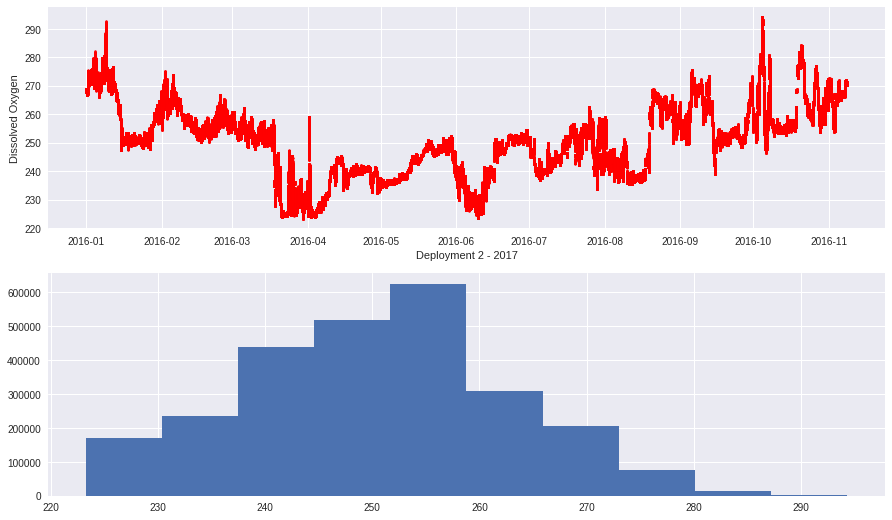

In [0]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(SM01['time'],SM01['dissolved_oxygen'],linestyle='None',marker='.',markersize=5,color='red')
ax1.set_xlabel('Deployment 2 - 2017')
ax1.set_ylabel('Dissolved Oxygen')

ax2.hist(SM01['dissolved_oxygen']);

### 5.1.2 Data Plotted for the 40 m Depth Sensor

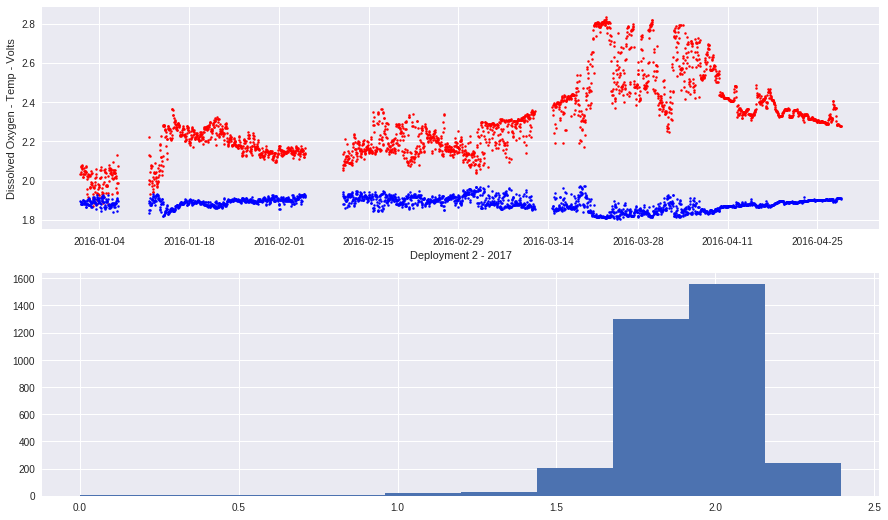

In [0]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(SM40['time'],SM40['oxy_temp_volts'],linestyle='None',marker='.',markersize=5,color='red')
ax1.plot(SM40['time'],SM40['oxy_calphase_volts'],linestyle='None',marker='.',markersize=5,color='blue')
ax1.set_xlabel('Deployment 2 - 2017')
ax1.set_ylabel('Dissolved Oxygen - Temp - Volts')

ax2.hist(SM80['oxy_temp_volts']);

### 5.1.3 Data Plotted for the 80 m Depth Sensor

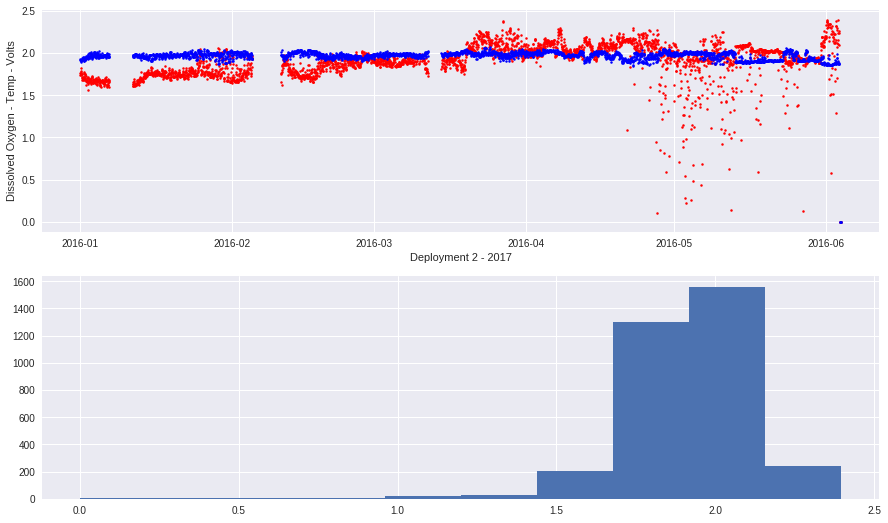

In [0]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(SM80['time'],SM80['oxy_temp_volts'],linestyle='None',marker='.',markersize=5,color='red')
ax1.plot(SM80['time'],SM80['oxy_calphase_volts'],linestyle='None',marker='.',markersize=5,color='blue')
ax1.set_xlabel('Deployment 2 - 2017')
ax1.set_ylabel('Dissolved Oxygen - Temp - Volts')

ax2.hist(SM80['oxy_temp_volts']);

### 5.1.4 Data Plotted for the 130 m Depth Sensor

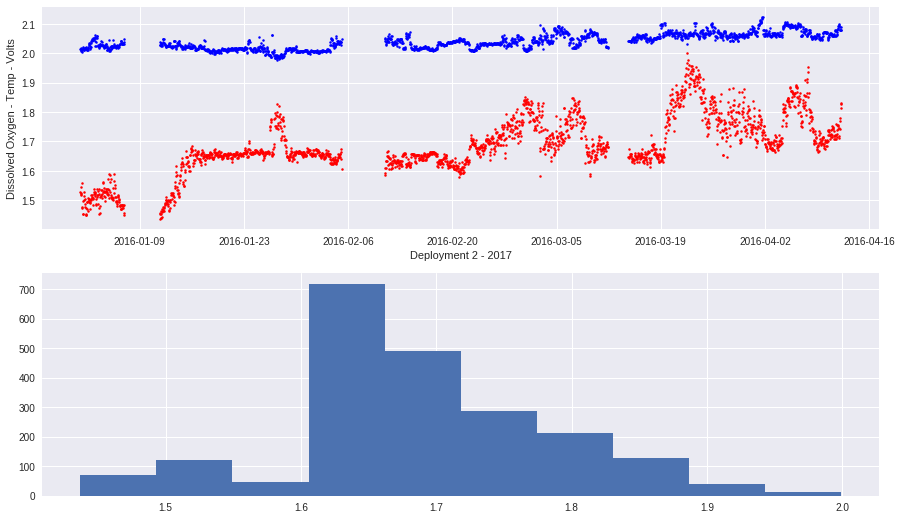

In [0]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(SM130['time'],SM130['oxy_temp_volts'],linestyle='None',marker='.',markersize=5,color='red')
ax1.plot(SM130['time'],SM130['oxy_calphase_volts'],linestyle='None',marker='.',markersize=5,color='blue')
ax1.set_xlabel('Deployment 2 - 2017')
ax1.set_ylabel('Dissolved Oxygen - Temp - Volts')

ax2.hist(SM130['oxy_temp_volts']);

## 5.2 Plotting the Data from the Profiling Sensors

### 5.2.1 Dissolved Oxygen Data from the Upper Wire Profiler

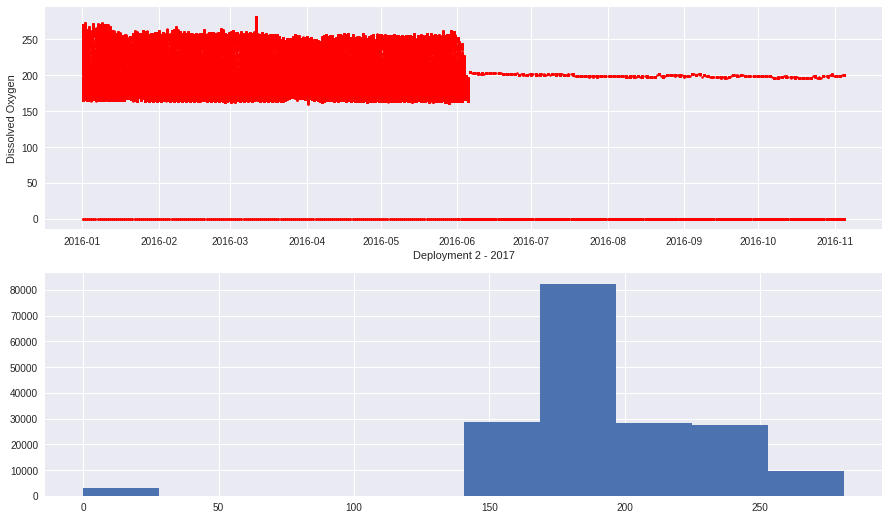

In [0]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(PMUC['time'],PMUC['dissolved_oxygen'],linestyle='None',marker='.',markersize=5,color='red')
ax1.set_xlabel('Deployment 2 - 2017')
ax1.set_ylabel('Dissolved Oxygen')

ax2.hist(PMUC['dissolved_oxygen']);

### 5.2.2 Dissolved Oxygen Data from the Lower Wire Profiler

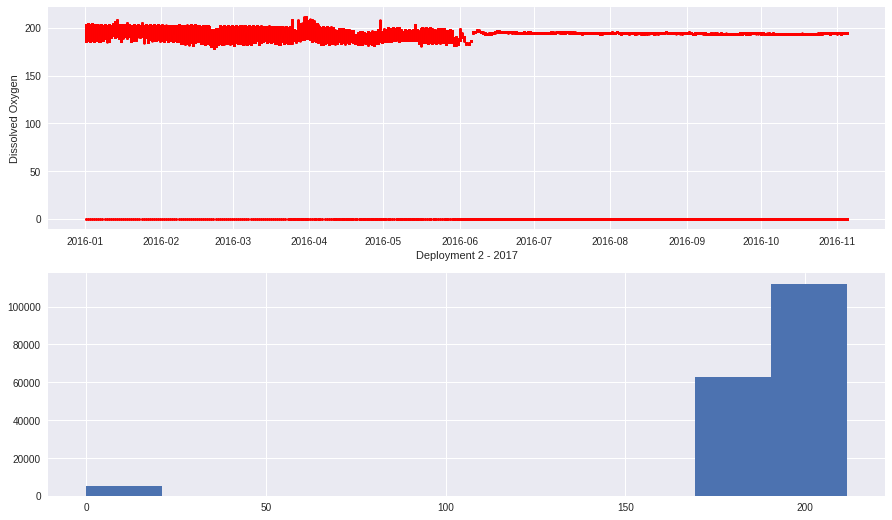

In [0]:
#@title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(PMLC['time'],PMLC['dissolved_oxygen'],linestyle='None',marker='.',markersize=5,color='red')
ax1.set_xlabel('Deployment 2 - 2017')
ax1.set_ylabel('Dissolved Oxygen')

ax2.hist(PMLC['dissolved_oxygen']);

## 5.3 Plot the Two Wire Profilers Together to make sure that Features match up in Space & Time

In [0]:
#@title
dtime = PMUC['time'].values
pressure = PMUC['int_ctd_pressure'].values
do = PMUC['dissolved_oxygen'].values
temp = PMUC['ctdpf_ckl_seawater_temperature'].values
sal = PMUC['practical_salinity'].values


dtime1 = PMLC['time'].values
pressure1 = PMLC['int_ctd_pressure'].values
do1 = PMLC['dissolved_oxygen'].values
temp1 = PMLC['ctdpf_ckl_seawater_temperature'].values
sal1 = PMLC['practical_salinity'].values

### 5.3.1 Dissolved Oxygen Values for the Two Profilers Together, and Individually

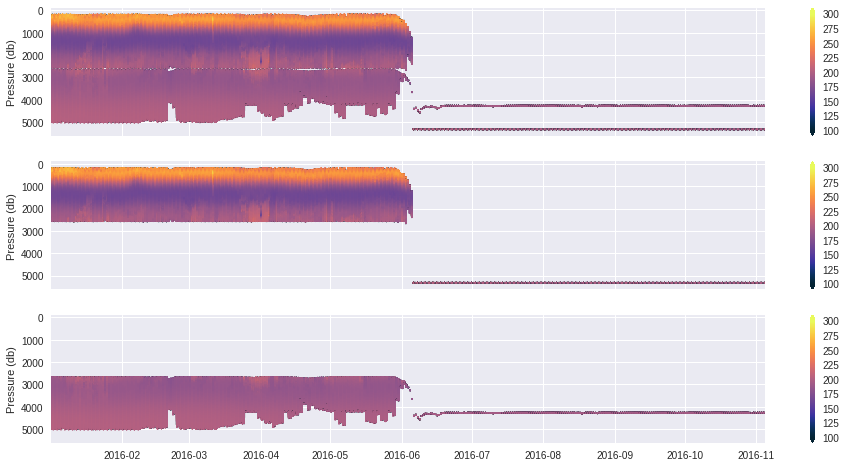

In [0]:
#@title
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,8))
sc1 = ax1.scatter(dtime, pressure, c=do, cmap=cmocean.cm.thermal, s=2, vmin=100, vmax=300,)
cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical', extend='both')
sc2 = ax1.scatter(dtime1, pressure1, c=do1, cmap=cmocean.cm.thermal, s=2, vmin=100, vmax=300,)

sc3 = ax2.scatter(dtime, pressure, c=do, cmap=cmocean.cm.thermal, s=2, vmin=100, vmax=300,)
cbar = fig.colorbar(sc3, ax=ax2, orientation='vertical', extend='both')

sc3 = ax3.scatter(dtime1, pressure1, c=do1, cmap=cmocean.cm.thermal, s=2, vmin=100, vmax=300,)
cbar = fig.colorbar(sc3, ax=ax3, orientation='vertical', extend='both')

# Because the X and Y axes are shared, we only have to set limits once
ax1.invert_yaxis() # Invert y axis
ax1.set_xlim(dtime[0],dtime[-1]) # Set the time limits to match the dataset

ax1.set_ylabel('Pressure (db)')
ax2.set_ylabel('Pressure (db)');
ax3.set_ylabel('Pressure (db)');

#fig.suptitle('CP02PMUO Deployment 9')
#fig.subplots_adjust(top=0.95);

### 5.3.2 Salinity values for the Two Profilers Together, and Individually

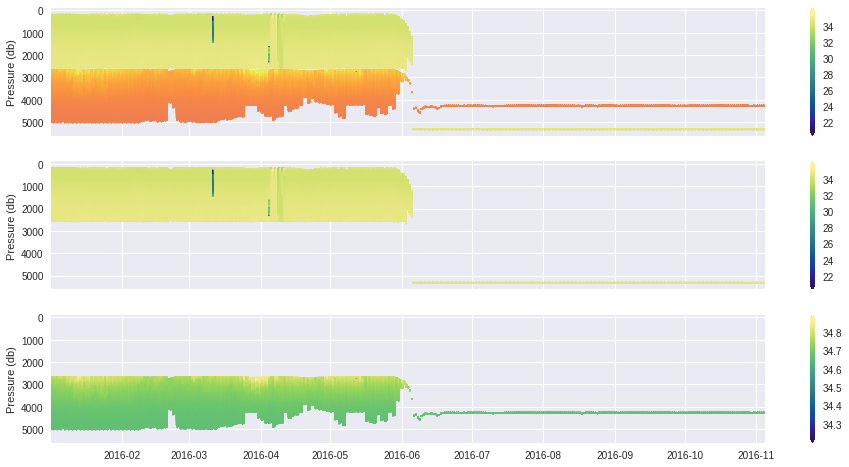

In [0]:
#@title
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,8))
sc1 = ax1.scatter(dtime, pressure, c=sal, cmap=cmocean.cm.haline, s=2)
sc2 = ax1.scatter(dtime1, pressure1, c=sal1, cmap=cmocean.cm.thermal, s=2)
cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical', extend='both')

sc3 = ax2.scatter(dtime, pressure, c=sal, cmap=cmocean.cm.haline, s=2)
cbar = fig.colorbar(sc3, ax=ax2, orientation='vertical', extend='both')

sc3 = ax3.scatter(dtime1, pressure1, c=sal1, cmap=cmocean.cm.haline, s=2)
cbar = fig.colorbar(sc3, ax=ax3, orientation='vertical', extend='both')

# Because the X and Y axes are shared, we only have to set limits once
ax1.invert_yaxis() # Invert y axis
ax1.set_xlim(dtime[0],dtime[-1]) # Set the time limits to match the dataset

ax1.set_ylabel('Pressure (db)')
ax2.set_ylabel('Pressure (db)');
ax3.set_ylabel('Pressure (db)');

In [0]:
#@title
BADPMUC = PMUC.where(PMUC['practical_salinity'] < 30)



### 5.3.3 Output of the Bad values identified from the salinity information used to develop the L2 DO Product

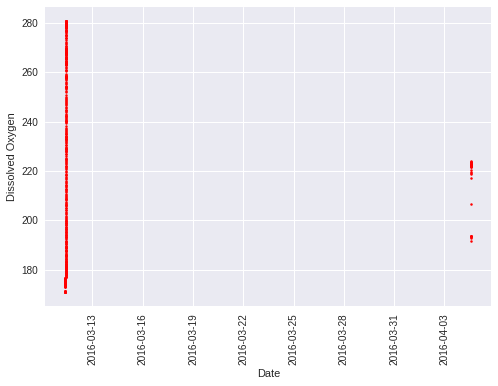

In [0]:
#@title
import matplotlib.pyplot as plt
x1 = plt.plot(BADPMUC['time'],BADPMUC['dissolved_oxygen'],linestyle='None',marker='.',markersize=5,color='red')
#plt.ylim(276,282);
plt.xlabel('Date');
plt.ylabel('Dissolved Oxygen')
plt.xticks(rotation=90);

## 5.4 Plot the Glider Data in 3 DImensions to Check for Missing Sections or Abnormalities in Glider Operations

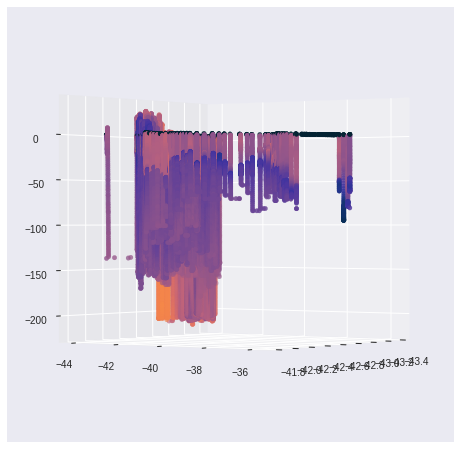

In [0]:
#@title
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter3D(PG['lat'], PG['lon'], PG['int_ctd_pressure']*-1, c=PG['sci_oxy4_oxygen'], cmap=cmocean.cm.thermal, vmin=200, vmax=300);

ax.view_init(0, 35)


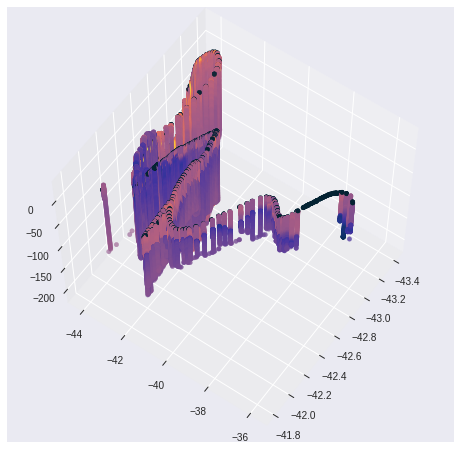

In [0]:
#@title
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter3D(PG['lat'], PG['lon'], PG['int_ctd_pressure']*-1, c=PG['sci_oxy4_oxygen'], cmap=cmocean.cm.thermal, vmin=200, vmax=300);

ax.view_init(60, 35)

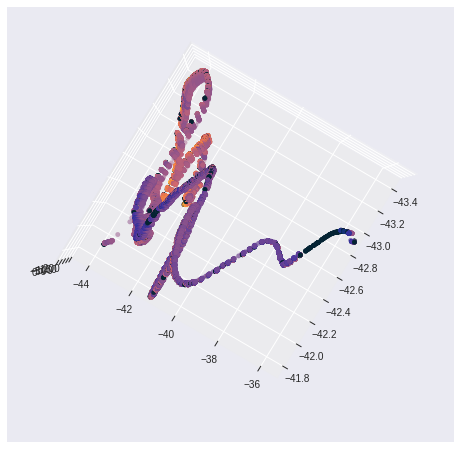

In [0]:
#@title
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter3D(PG['lat'], PG['lon'], PG['int_ctd_pressure']*-1, c=PG['sci_oxy4_oxygen'], cmap=cmocean.cm.thermal, vmin=200, vmax=300);

ax.view_init(90, 35)

## 5.5 Deconstruct the Surface Time Series Data to Determine Data Value Issues

In [0]:
#@title
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [0]:
#@title
SM02 = SM01.to_dataframe();


/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


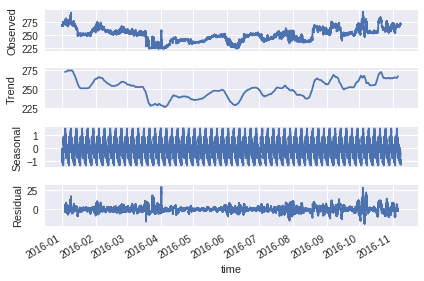

In [0]:
#@title
from pylab import rcParams

decompfreq = (24*60*60)/(2);

decomposition = sm.tsa.seasonal_decompose(SM02['dissolved_oxygen'], freq=decompfreq, model='additive')
fig = decomposition.plot()
plt.show()

# 6. Notable Results and Actions Needed

Based on this preliminary analysis from the perspective of an end-user, the Argentine Basin Global Array has some heavy issues with Dissolved Oxygen measurements. However, general trends and large scale features are still readily apparent in the data and could be used for basic feature identification for sensors or integration with bio-acoustic data, provided that data is without major issue. The following list includes some notable information encountered during the data validation workflow.


*   During Data Identification
    * A number of the datasets show strong data coverage for 2017 in Deployment 3, however have limited or zero actual data for dissolved oxygen L2 products
    * Identification of data was difficut to dtermine the extent, coverage, and availability of the data within the OOI data portal.
    * The OOI data portal showed graphs, plotted with data that either did not exist, or was not the correct variable noted for analysis.
*   During I/O Operations
    * Listed methods include dashes (i.e, wfp-recovered), which should be listed as underscores. This is likely a developer issue but needs to be solved for end level users to accurately access a number of the datasets.
    * Data from the fixed depth DO sensors appear to have totally different variables and different calculation streams
    * The end products have different variable names and missing or damaged calibration records based on Vendor reports
* During Data Assessment
    * For the surface DO sensor after detrending there were clearly several outliers in the data that would not be expected with either the seasonal or the daily variability
    * There were clear features visible with the upper and lower water column profilers that suggest the datat to be well correlated between the isntruments
    * Glider data shows that there are several times where the glider was not completing the proposed tracks, iehter sitting at the surface or being located further down in the water column.

